In [ ]:
"""
Created on Mon May 16 19:00:32 2022
@author: Ajit Johnson Nirmal
SCIMAP tutorial May 2022
"""

In [1]:
# load packages
import scimap as sm
import scanpy as sc
import pandas as pd
import anndata as ad

In [2]:
common_path = "/Users/aj/Dropbox (Partners HealthCare)/conferences/scimap_tutorial/may_2022_tutorial/"
#common_path = "C:/Users/ajn16/Dropbox (Partners HealthCare)/conferences/scimap_tutorial/may_2022_tutorial/"

In [ ]:
# load data
#adata = sm.pp.mcmicro_to_scimap (image_path= str(common_path) + 'exemplar_001/quantification/unmicst-exemplar-001_cell.csv')
#manual_gate = pd.read_csv(str(common_path) + 'manual_gates.csv')
#adata = sm.pp.rescale (adata, gate=manual_gate)
#phenotype = pd.read_csv(str(common_path) + 'phenotype_workflow.csv')
#adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 
# add user defined ROI's before proceeding

In [3]:
# load saved anndata object
adata = ad.read(str(common_path) + 'may2022_tutorial.h5ad')

### Calculate distances between cell types

`sm.tl.spatial_distance`: The function allows users to calculate the average shortest between phenotypes or clusters of interest (3D data supported).

In [4]:
adata = sm.tl.spatial_distance (adata, 
                               x_coordinate='X_centroid', y_coordinate='Y_centroid', 
                               z_coordinate=None, 
                               phenotype='phenotype', 
                               subset=None, 
                               imageid='imageid', 
                               label='spatial_distance')

Processing Image: unmicst-exemplar-001_cell


In [5]:
adata.uns['spatial_distance']

Other Immune cells     Unknown     Myeloid  \
unmicst-exemplar-001_cell_1                0.000000  508.809972  561.874000   
unmicst-exemplar-001_cell_2                0.000000   25.516388   63.601485   
unmicst-exemplar-001_cell_3                0.000000   15.315383   59.503385   
unmicst-exemplar-001_cell_4                0.000000   28.482334   13.752853   
unmicst-exemplar-001_cell_5               26.357699    0.000000   45.589024   
...                                             ...         ...         ...   
unmicst-exemplar-001_cell_11166            0.000000  106.320078   70.605640   
unmicst-exemplar-001_cell_11167            0.000000   31.114913   72.531210   
unmicst-exemplar-001_cell_11168            0.000000   50.369768   70.748013   
unmicst-exemplar-001_cell_11169            0.000000  103.275795   64.057762   
unmicst-exemplar-001_cell_11170           10.165511    0.000000   88.288672   

                                      Tumor  ASMA+ cells  Neutrophils  \
unmicst-exemplar-001_cell_1      547.544519   506.115689   581.323686   
unmicst-exemplar-001_cell_2       67.024246    27.928445   157.289841   
unmicst-exemplar-001_cell_3       56.590105    34.479892   147.005355   
unmicst-exemplar-001_cell_4       51.500837    46.148651   111.763900   
unmicst-exemplar-001_cell_5       30.234937    58.354288   120.715789   
...                                     ...          ...          ...   
unmicst-exemplar-001_cell_11166   96.293073    50.637223    91.990689   
unmicst-exemplar-001_cell_11167  118.065360    54.921505   136.323479   
unmicst-exemplar-001_cell_11168  126.968337    36.065610   123.048957   
unmicst-exemplar-001_cell_11169   91.786425    64.741519    93.600860   
unmicst-exemplar-001_cell_11170  113.521913    86.006117   150.562555   

                                       Treg     NK cells  
unmicst-exemplar-001_cell_1      570.267087  1248.001853  
unmicst-exemplar-001_cell_2      100.258654   816.837582  
unmicst-exemplar-001_cell_3       96.374952   817.307871  
unmicst-exemplar-001_cell_4      143.243322   746.050742  
unmicst-exemplar-001_cell_5       96.739267   824.241184  
...                                     ...          ...  
unmicst-exemplar-001_cell_11166   43.229554   410.740868  
unmicst-exemplar-001_cell_11167   30.072174   399.697389  
unmicst-exemplar-001_cell_11168   40.094561   409.435592  
unmicst-exemplar-001_cell_11169   35.697321   397.194037  
unmicst-exemplar-001_cell_11170   23.735243   389.273701  

[11170 rows x 8 columns]

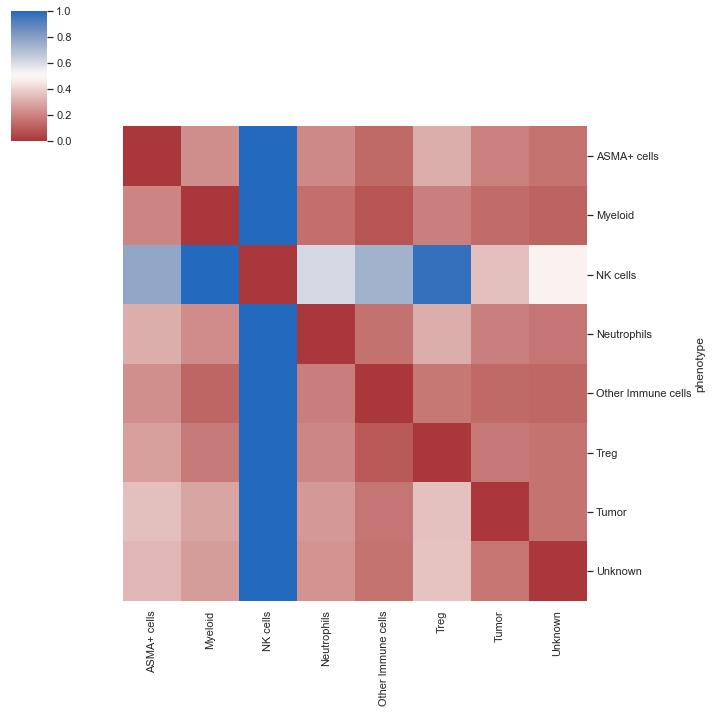

In [7]:
# summary heatmap
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 1]
sm.pl.spatial_distance (adata)

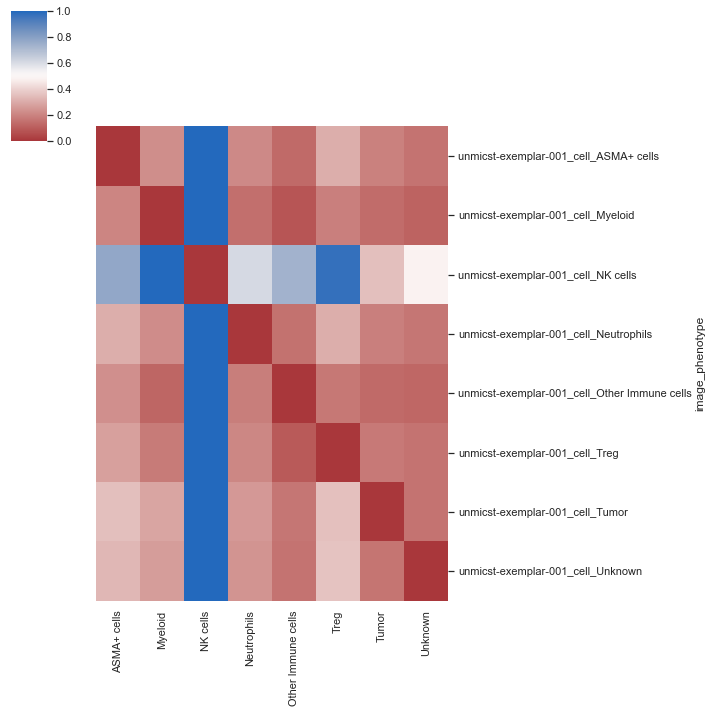

In [8]:
# Heatmap without summarizing the individual images
sm.pl.spatial_distance (adata, heatmap_summarize=False)

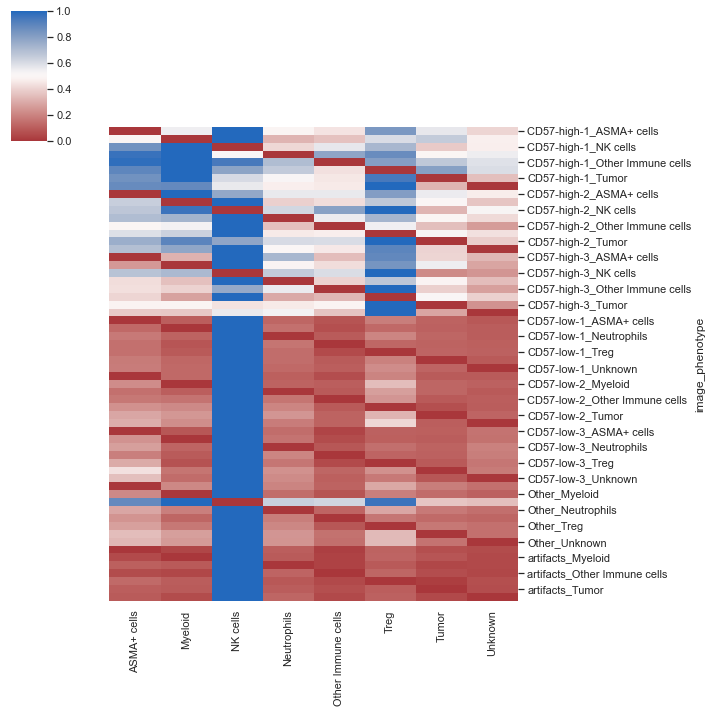

In [9]:
sm.pl.spatial_distance (adata, heatmap_summarize=False, imageid='ROI_individual')

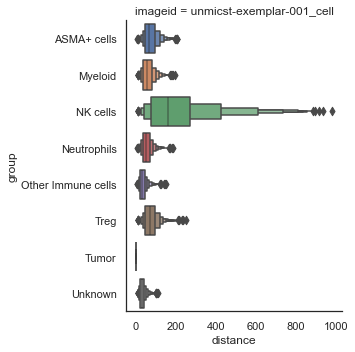

In [10]:
# Numeric plot of shortest distance of phenotypes 
# from tumor cells
sm.pl.spatial_distance (adata, method='numeric',distance_from='Tumor')

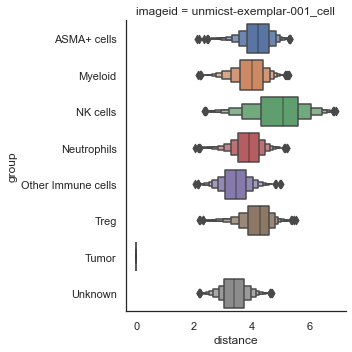

In [11]:
sm.pl.spatial_distance (adata, method='numeric',distance_from='Tumor', log=True)

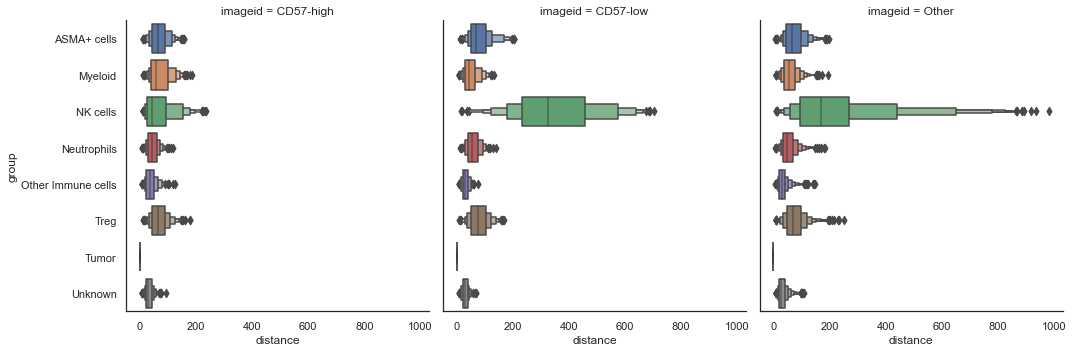

In [12]:
# plot for each ROI seperately
sm.pl.spatial_distance (adata, method='numeric',distance_from='Tumor', imageid='ROI')

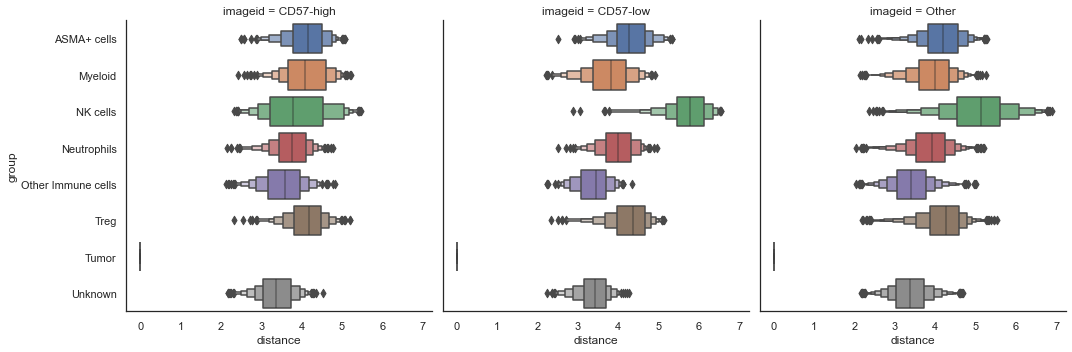

In [13]:
sm.pl.spatial_distance (adata, method='numeric',distance_from='Tumor', imageid='ROI', log=True)

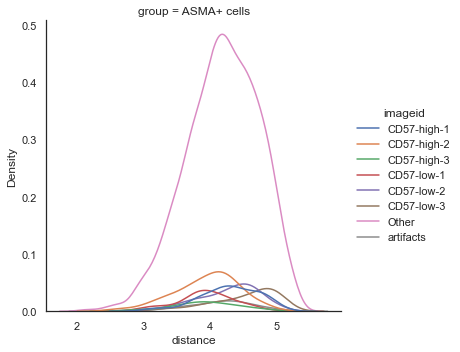

In [14]:
# Distribution plot of shortest distance of phenotypes from Tumor cells
sm.pl.spatial_distance (adata, method='distribution',distance_from='Tumor',distance_to = 'ASMA+ cells',
    imageid='ROI_individual', log=True)

### Spatial co-occurance analysis

`sm.tl.spatial_interaction`: The function allows users to computes how likely celltypes are found next to each another compared to random background (3D data supported).

In [15]:
# Using the radius method to identify local neighbours compute P-values
adata = sm.tl.spatial_interaction (adata, 
                                  method='radius', 
                                  radius=30, 
                                  label='spatial_interaction_radius')

Processing Image: ['unmicst-exemplar-001_cell']
Categories (1, object): ['unmicst-exemplar-001_cell']
Identifying neighbours within 30 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


In [16]:
# Using the KNN method to identify local neighbours 
adata = sm.tl.spatial_interaction(adata, 
                                  method='knn', 
                                  knn=10, 
                                  label='spatial_interaction_knn')

Processing Image: ['unmicst-exemplar-001_cell']
Categories (1, object): ['unmicst-exemplar-001_cell']
Identifying the 10 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


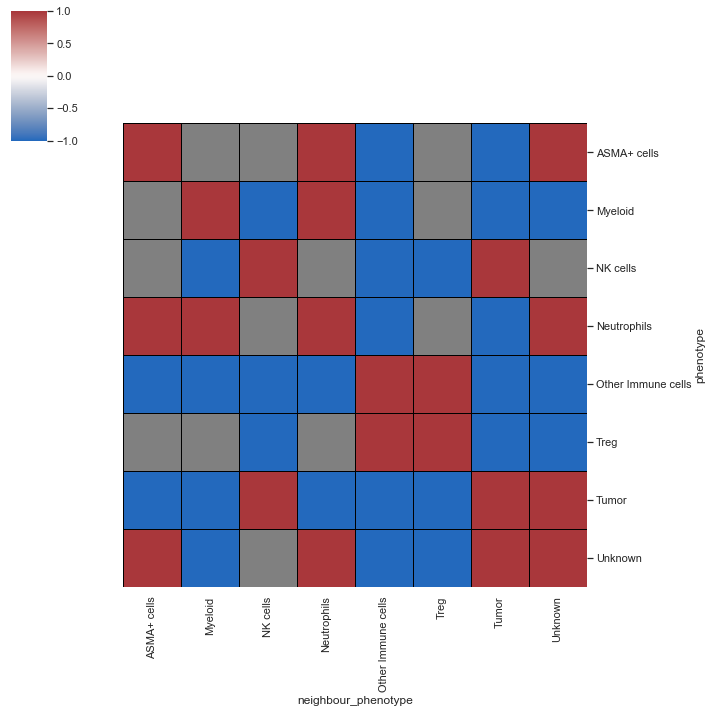

In [22]:
# view results
# spatial_interaction heatmap for a single image
sm.pl.spatial_interaction(adata, 
                          summarize_plot=True, 
                          binary_view=True,
                          spatial_interaction='spatial_interaction_radius',
                          row_cluster=False, linewidths=0.75, linecolor='black')


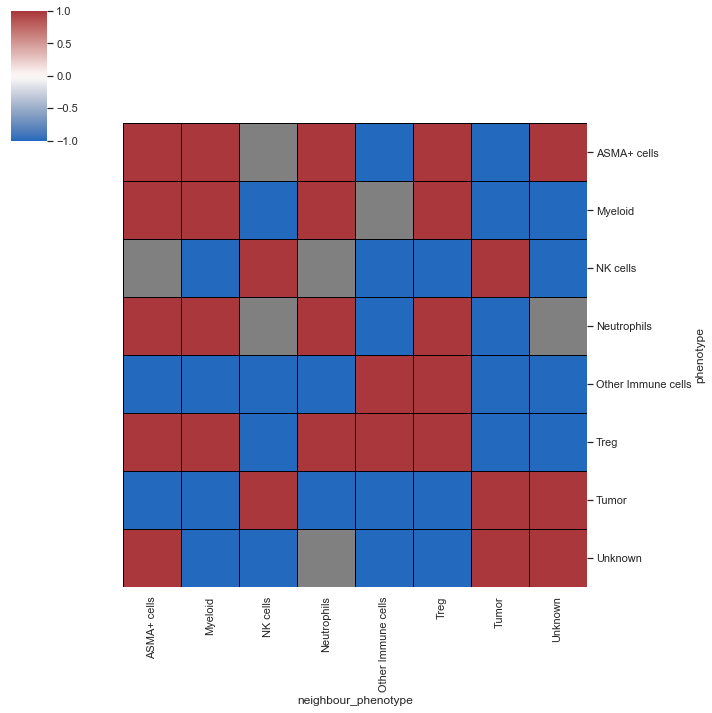

In [23]:
# spatial_interaction heatmap for a single image
sm.pl.spatial_interaction(adata, 
                          summarize_plot=True, 
                          binary_view=True,
                          spatial_interaction='spatial_interaction_knn',
                          row_cluster=False, linewidths=0.75, linecolor='black')

In [24]:
# Pass the ROI's as different images
adata = sm.tl.spatial_interaction(adata, 
                                  method='radius', 
                                  imageid = 'ROI_individual',
                                  radius=30, 
                                  label='spatial_interaction_radius_roi')

Processing Image: ['Other']
Categories (1, object): ['Other']
Identifying neighbours within 30 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['artifacts']
Categories (1, object): ['artifacts']
Identifying neighbours within 30 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['CD57-low-1']
Categories (1, object): ['CD57-low-1']
Identifying neighbours within 30 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['CD57-low-3']
Categories (1, object): ['CD57-low-3']
Identifying neighbours within 30 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['CD57-low-2']
Categories (1, object): ['CD57-low-2']
Identifying neighbours within 30 pixels of e

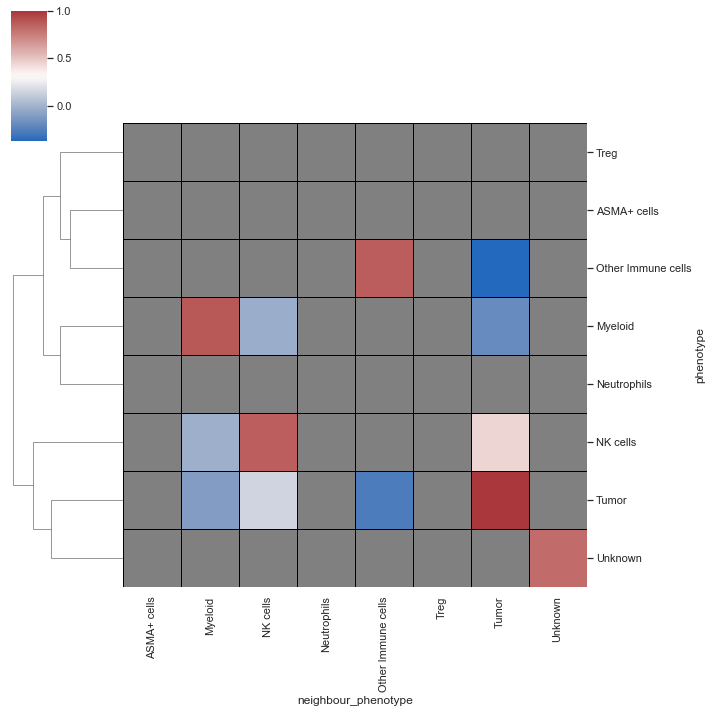

In [25]:
# spatial_interaction heatmap
sm.pl.spatial_interaction(adata, 
                          summarize_plot=True, 
                          spatial_interaction='spatial_interaction_radius_roi',
                          row_cluster=True, linewidths=0.75, linecolor='black')

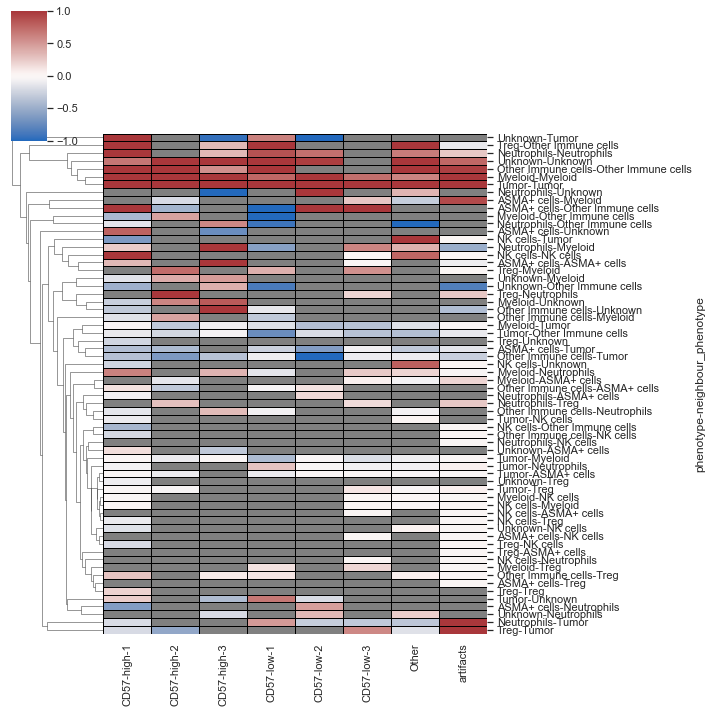

In [26]:
# spatial_interaction heatmap
sm.pl.spatial_interaction(adata, 
                          summarize_plot=False, 
                          spatial_interaction='spatial_interaction_radius_roi',
                          yticklabels=True,
                          row_cluster=True, linewidths=0.75, linecolor='black')

### Quantifying the proximity score

`sm.tl.spatial_pscore`: A scoring system to evaluate user defined proximity between cell types.  

The function generates two scores and saved at adata.uns:  
- Proximity Density: Total number of interactions identified divided by the total number of cells of the cell-types that were used for interaction analysis.  
- Proximity Volume: Total number of interactions identified divided by the total number of all cells in the data.
The interaction sites are also recorded and saved in adata.obs

In [27]:
# Calculate the score for proximity between `Tumor CD30+` cells and `M2 Macrophages`
adata =  sm.tl.spatial_pscore (adata,proximity= ['Tumor', 'NK cells'],
                               score_by = 'ROI_individual',
                               phenotype='phenotype',
                               method='radius',
                               radius=20,
                               subset=None, 
                               label='spatial_pscore')

Identifying neighbours within 20 pixels of every cell
Finding neighbourhoods with Tumor
Finding neighbourhoods with NK cells
Please check:
adata.obs['spatial_pscore'] &
adata.uns['spatial_pscore'] for results


/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



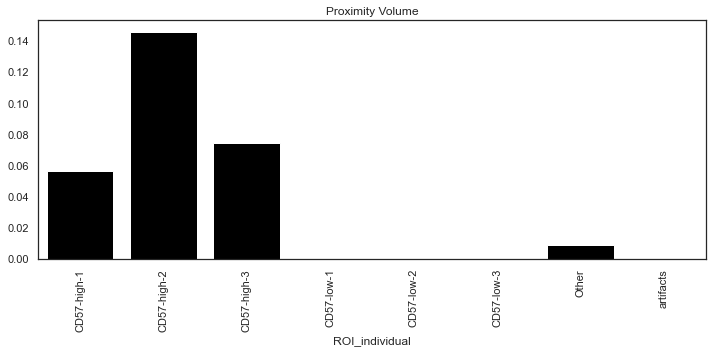

In [28]:
# Plot only `Proximity Volume` scores
plt.figure(figsize=(10, 5))
sm.pl.spatial_pscore (adata, color='Black', plot_score='Proximity Volume')

/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



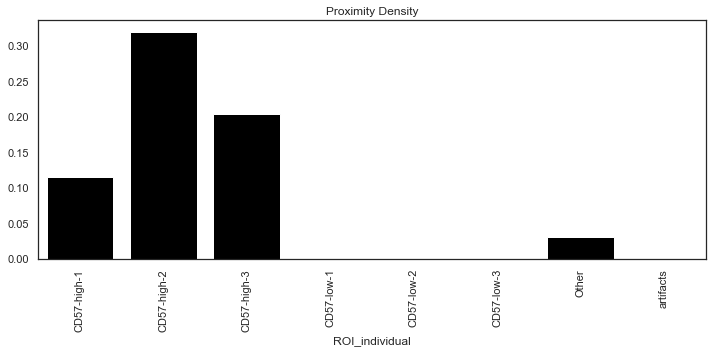

In [29]:
# Plot only `Proximity Density` scores
plt.figure(figsize=(10, 5))
sm.pl.spatial_pscore (adata, color='Black', plot_score='Proximity Density')

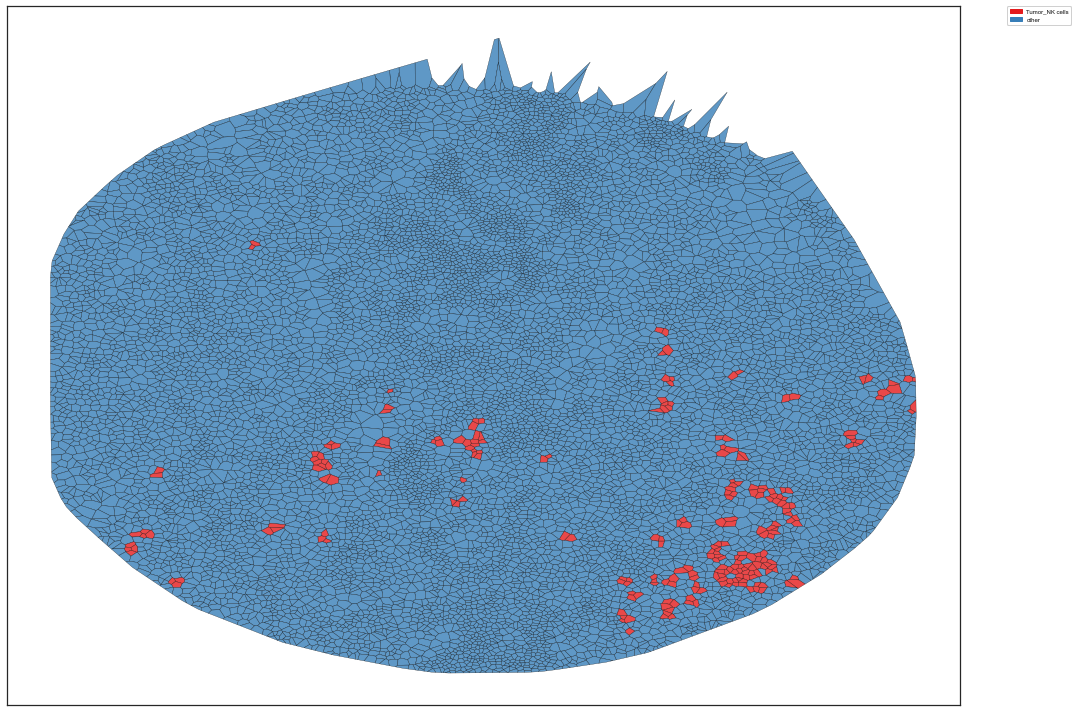

In [30]:
# voronoi plot
plt.rcParams['figure.figsize'] = [15, 10]
sm.pl.voronoi(adata, color_by='spatial_pscore', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=5000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

In [31]:
# save adata
adata.write(str(common_path) + 'may2022_tutorial.h5ad')

/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'spatial_pscore' as categorical


This concludes this tutorial